In [1]:

import numpy as np
import pandas as pd  

from gtda.plotting import plot_point_cloud


from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

from gtda.mapper.pipeline import MapperPipeline


from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
df_breast = pd.read_csv("C:/Users/user/cancer data/Breast Cancer Wisconsin/data.csv")
df_breast['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [3]:
M_data = df_breast[df_breast['diagnosis'] == 'M']
M_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0            0.1622   
1    ...          23.41           158.80      1956.0            0.1238   
2    ...          25.53           152.50      1709.0            0.1444   
3    ...          26.50            98.87       567.7            0.2098   
4    ...          16.67           152.20      1575.0            0.1374   
..   ...            ...              ...         ...               ...   
563  ...          29.41           179.10      1819.0            0.1407   
564  ...          26.40           166.10      2027.0            0.1410   
565  ...          38.25           155.00      1731.0            0.1166   
566  ...          34.12           126.70      1124.0            0.1139   
567  ...          39.42           184.60      1821.0            0.1650   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0               0.6656           0.7119                0.2654          0.4601   
1               0.1866           0.2416                0.1860          0.2750   
2               0.4245           0.4504                0.2430          0.3613   
3               0.8663           0.6869                0.2575          0.6638   
4               0.2050           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
563             0.4186           0.6599                0.2542          0.2929   
564             0.2113           0.4107                0.2216          0.2060   
565             0.1922           0.3215                0.1628          0.2572   
566             0.3094           0.3403                0.1418          0.2218   
567             0.8681           0.9387                0.2650          0.4087   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
columns_with_index = list(enumerate(df_breast.columns))

for index, column_name in columns_with_index:
    print(index - 2, column_name)

-2 id
-1 diagnosis
0 radius_mean
1 texture_mean
2 perimeter_mean
3 area_mean
4 smoothness_mean
5 compactness_mean
6 concavity_mean
7 concave points_mean
8 symmetry_mean
9 fractal_dimension_mean
10 radius_se
11 texture_se
12 perimeter_se
13 area_se
14 smoothness_se
15 compactness_se
16 concavity_se
17 concave points_se
18 symmetry_se
19 fractal_dimension_se
20 radius_worst
21 texture_worst
22 perimeter_worst
23 area_worst
24 smoothness_worst
25 compactness_worst
26 concavity_worst
27 concave points_worst
28 symmetry_worst
29 fractal_dimension_worst
30 Unnamed: 32


In [5]:
feature_names = [c for c in df_breast.columns if c not in ["id", "diagnosis", 'Unnamed: 32']]
df_breast["diagnosis"] = df_breast["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X_breast = np.array(df_breast[feature_names].fillna(0))
y = np.array(df_breast["diagnosis"])
print(X_breast)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=[3, 7, 17, 28])
# Define cover
cover = CubicalCover(n_intervals=20
                     , overlap_frac=0.25)
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [7]:
df_breast["Cancer Type"] = y
color_data = pd.get_dummies(df_breast["Cancer Type"], prefix="Cancer")

# Plot the Mapper graph with colors based on cancer type
fig = plot_static_mapper_graph(pipe, X_breast, color_data=color_data)
fig.show(config={'scrollZoom': True})

In [ ]:
# Fit the pipeline
pipe.fit(X_breast)

# Transform the data
graph = pipe.fit_transform(X_breast)

In [11]:
node_id = 225
node_elements = graph.vs["node_elements"]

print(f"""
Node ID: {node_id}
Node elements: {node_elements[node_id]}
Data points: {X_breast[node_elements[node_id]]}
""")


Node ID: 225
Node elements: [144 412 425]
Data points: [[1.075e+01 1.497e+01 6.826e+01 3.553e+02 7.793e-02 5.139e-02 2.251e-02
  7.875e-03 1.399e-01 5.688e-02 2.525e-01 1.239e+00 1.806e+00 1.774e+01
  6.547e-03 1.781e-02 2.018e-02 5.612e-03 1.671e-02 2.360e-03 1.195e+01
  2.072e+01 7.779e+01 4.412e+02 1.076e-01 1.223e-01 9.755e-02 3.413e-02
  2.300e-01 6.769e-02]
 [9.397e+00 2.168e+01 5.975e+01 2.688e+02 7.969e-02 6.053e-02 3.735e-02
  5.128e-03 1.274e-01 6.724e-02 1.186e-01 1.182e+00 1.174e+00 6.802e+00
  5.515e-03 2.674e-02 3.735e-02 5.128e-03 1.951e-02 4.583e-03 9.965e+00
  2.799e+01 6.661e+01 3.010e+02 1.086e-01 1.887e-01 1.868e-01 2.564e-02
  2.376e-01 9.206e-02]
 [1.003e+01 2.128e+01 6.319e+01 3.073e+02 8.117e-02 3.912e-02 2.470e-03
  5.159e-03 1.630e-01 6.439e-02 1.851e-01 1.341e+00 1.184e+00 1.160e+01
  5.724e-03 5.697e-03 2.074e-03 3.527e-03 1.445e-02 2.411e-03 1.111e+01
  2.894e+01 6.992e+01 3.763e+02 1.126e-01 7.094e-02 1.235e-02 2.579e-02
  2.349e-01 8.061e-02]]



## On the original graph 

We will see the biggest connected component subgraph on the original diagram:

In [ ]:
components = graph.connected_components()


largest_component_nodes = components[7]
graph.vs[largest_component_nodes]["id"]

In [70]:
largest_component_nodes = components[7]

patients_in_largest_component = graph.vs[largest_component_nodes]["node_elements"]

flattened_patients_in_largest_component = np.concatenate(patients_in_largest_component).tolist()

unique_patients_in_largest_component = list(set(flattened_patients_in_largest_component))

print(unique_patients_in_largest_component)


[515, 518, 7, 519, 522, 523, 525, 526, 527, 16, 529, 530, 19, 20, 531, 21, 534, 536, 532, 538, 537, 540, 541, 543, 544, 545, 546, 547, 37, 549, 39, 40, 552, 551, 554, 556, 557, 46, 553, 48, 49, 50, 51, 52, 54, 55, 568, 58, 59, 61, 66, 67, 69, 74, 79, 80, 84, 88, 90, 92, 93, 96, 99, 101, 102, 103, 104, 106, 107, 109, 110, 113, 114, 115, 120, 123, 124, 125, 126, 130, 133, 135, 137, 140, 141, 142, 143, 144, 145, 148, 149, 151, 153, 155, 158, 159, 165, 166, 169, 170, 171, 174, 175, 178, 179, 185, 187, 188, 189, 195, 200, 204, 206, 550, 209, 211, 217, 220, 222, 224, 225, 226, 227, 228, 231, 232, 234, 235, 240, 241, 243, 245, 246, 247, 249, 251, 255, 266, 267, 268, 270, 271, 273, 276, 278, 279, 285, 286, 287, 289, 291, 293, 294, 295, 296, 298, 301, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314, 316, 320, 322, 324, 325, 326, 327, 331, 332, 333, 334, 336, 338, 340, 341, 344, 345, 346, 347, 348, 349, 350, 354, 357, 358, 359, 360, 361, 362, 364, 367, 371, 374, 377, 378, 381, 383, 384, 38

In [74]:
df_breast["In_Largest_Component"] = 0  

df_breast.loc[unique_patients_in_largest_component, "In_Largest_Component"] = 1

df_breast[df_breast["In_Largest_Component"] == 1]

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
7    84458202          1       13.710         20.83           90.20   
16     848406          1       14.680         20.13           94.74   
19    8510426          0       13.540         14.36           87.46   
20    8510653          0       13.080         15.71           85.63   
21    8510824          0        9.504         12.44           60.34   
..        ...        ...          ...           ...             ...   
553    924342          0        9.333         21.94           59.01   
554    924632          0       12.880         28.92           82.50   
556    924964          0       10.160         19.59           64.73   
557    925236          0        9.423         27.88           59.26   
568     92751          0        7.760         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
7        577.9          0.11890           0.16450        0.093660   
16       

In [75]:
color_data["Largest_Component"] = df_breast["In_Largest_Component"]

fig = plot_static_mapper_graph(pipe, X_breast, color_data=color_data)
fig.show(config={'scrollZoom': True})


So we can see that indeed our code identified the biggest connected component correctly. There are few points which seem to be on the subgraph but coloured differently. That;s because they are not connected to anything there

In [61]:
print("Nodes in largest component (components[7]):", largest_component_nodes)
print("Node names for these nodes:", subgraph)


Nodes in largest component (components[7]): [9, 10, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 56, 57, 59, 60, 61, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 93, 94, 97, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 126, 127, 132, 133, 134, 135, 141, 142, 146, 148, 149, 151, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 178, 179, 180, 181, 186, 187, 193, 194, 195, 196, 197, 198, 199, 205, 206, 211, 214, 215, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 234, 235, 237, 242, 248, 249, 250, 251, 254, 255, 256, 259, 260, 261, 264, 265, 266, 267, 275, 276, 287, 291, 293, 296, 297, 304, 305, 306, 309, 310, 314, 315, 316, 317, 318, 319, 320, 322, 323, 324, 325, 326, 333, 334, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 352, 363, 364, 365, 367, 377, 378, 379, 380, 381, 382, 383, 387, 388, 389, 391, 394, 396, 398, 399, 400, 401, 402, 403, 404, 408, 409, 411, 412, 414, 415

In [64]:
# Assuming the correct attribute is 'patient_id' (replace this with the correct one based on the previous step)
patients_in_largest_component = graph.vs[largest_component_nodes]["patient_id"]

# Now 'patients_in_largest_component' contains the patient IDs (or names) in the largest component
print(patients_in_largest_component)


KeyError: 'Attribute does not exist'

In [40]:
import plotly.graph_objs as go
import plotly.express as px

# Step 1: Detect connected components
components = graph.connected_components()
# Step 2: Get the layout for the graph (force-directed layout)
layout = graph.layout('fr')

# Extract the coordinates from the layout
x_vals = [layout[k][0] for k in range(len(graph.vs))]
y_vals = [layout[k][1] for k in range(len(graph.vs))]

# Get edge coordinates for the graph
edge_x = []
edge_y = []
for edge in graph.es:
    x0, y0 = layout[edge.source]
    x1, y1 = layout[edge.target]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # Break between edges
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create an edge trace for Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Step 3: Generate a color for each connected component
colors = px.colors.qualitative.Plotly  # A color palette with distinct colors

# If you need more colors, extend the color palette
while len(colors) < len(components):
    colors.extend(colors)

# Step 4: Assign colors to the nodes based on the connected component they belong to
node_trace = go.Scatter(
    x=x_vals, y=y_vals,
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='Rainbow',
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Component',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)
)

# Initialize the color list for all nodes
new_colors = ['blue'] * len(node_trace.x)  # Default color for non-highlighted nodes

# Assign a unique color to each connected component
for component_index, component in enumerate(components):
    component_color = colors[component_index % len(colors)]  # Get the color for the component
    for node in component:
        new_colors[node] = component_color  # Assign the color to each node in the component

# Update the node colors in the Plotly figure
node_trace.marker.color = new_colors

# Step 5: Create the Plotly figure and enable scrollZoom
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Mapper Graph with Connected Components',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    annotations=[dict(
                        text="Zoom and Pan Enabled",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
               )

# Enable scroll zoom
fig.show(config={'scrollZoom': True})


In [48]:
import plotly.graph_objs as go

# Get the layout for the subgraph (force-directed layout)
layout = main_subgraph.layout('fr')

# Extract the coordinates from the layout
x_vals = [layout[k][0] for k in range(len(main_subgraph.vs))]
y_vals = [layout[k][1] for k in range(len(main_subgraph.vs))]

# Get edge coordinates for the subgraph
edge_x = []
edge_y = []
for edge in main_subgraph.es:
    x0, y0 = layout[edge.source]
    x1, y1 = layout[edge.target]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # Break between edges
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create an edge trace for Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Extract node names (assuming the subgraph nodes have names)
node_names = main_subgraph.vs["name"] if "name" in main_subgraph.vs.attributes() else [str(i) for i in range(len(main_subgraph.vs))]

# Create node trace with node names only on hover (remove labels from the graph itself)
node_trace = go.Scatter(
    x=x_vals, y=y_vals,
    mode='markers',
    hoverinfo='text',  # Show node names only on hover
    text=node_names,  # Hover text will show the node names
    marker=dict(
        showscale=True,
        colorscale='Rainbow',
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)
)

# Assign a default color to all nodes (you can modify colors as needed)
node_color = ['blue'] * len(node_trace.x)
node_trace.marker.color = node_color

# Create the Plotly figure with scrollZoom enabled
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Subgraph with Hover Node Names',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    annotations=[dict(
                        text="Zoom and Pan Enabled",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
               )

# Enable scroll zoom in the Plotly figure
fig.show(config={'scrollZoom': True})


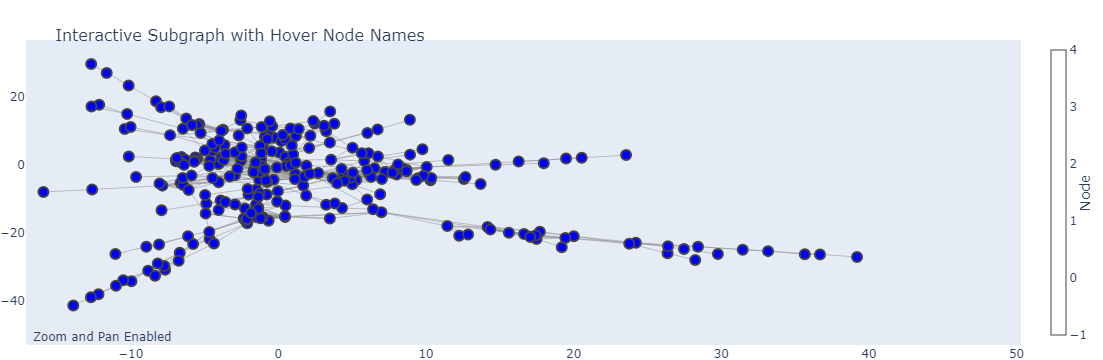

In [53]:
import plotly.graph_objs as go

# Get the layout for the subgraph (force-directed layout)
layout = subgraph.layout('fr')

# Extract the coordinates from the layout
x_vals = [layout[k][0] for k in range(len(subgraph.vs))]
y_vals = [layout[k][1] for k in range(len(subgraph.vs))]

# Get edge coordinates for the subgraph
edge_x = []
edge_y = []
for edge in subgraph.es:
    x0, y0 = layout[edge.source]
    x1, y1 = layout[edge.target]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # Break between edges
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_names = subgraph.vs["name"] if "name" in subgraph.vs.attributes() else [str(i) for i in range(len(subgraph.vs))]

node_trace = go.Scatter(
    x=x_vals, y=y_vals,
    mode='markers',
    hoverinfo='text',  # Show node names only on hover
    text=node_names,  # Hover text will show the node names
    marker=dict(
        showscale=True,
        colorscale='Rainbow',
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)
)

node_color = ['blue'] * len(node_trace.x)
node_trace.marker.color = node_color

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Subgraph with Hover Node Names',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    annotations=[dict(
                        text="Zoom and Pan Enabled",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
               )

fig.show(config={'scrollZoom': True})


## Connected components

In [12]:
components = graph.connected_components()

print(components)

Clustering with 573 elements and 233 clusters
[  0] 0
[  1] 1, 2, 3, 308, 445
[  2] 4
[  3] 5
[  4] 6
[  5] 7
[  6] 8
[  7] 9, 10, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 56, 57, 59, 60,
      61, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85,
      86, 87, 88, 93, 94, 97, 108, 109, 110, 111, 112, 113, 114, 115, 117,
      118, 119, 126, 127, 132, 133, 134, 135, 141, 142, 146, 148, 149, 151,
      153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
      170, 171, 172, 173, 175, 178, 179, 180, 181, 186, 187, 193, 194, 195,
      196, 197, 198, 199, 205, 206, 211, 214, 215, 220, 221, 222, 223, 224,
      225, 226, 227, 228, 229, 234, 235, 237, 242, 248, 249, 250, 251, 254,
      255, 256, 259, 260, 261, 264, 265, 266, 267, 275, 276, 287, 291, 293,
      296, 297, 304, 305, 306, 309, 310, 314, 315, 316, 317, 318, 319, 320,
      322, 323, 324, 325, 326, 333, 334, 336, 337, 338, 339, 340, 341, 342,
      343, 344, 345, 346, 347, 348, 352, 363

In [27]:
largest_component_nodes = components[7]

subgraph = graph.subgraph(largest_component_nodes)


In [26]:
# print(graph.vs.attributes()) 

# subgraph.vs["node_elements"]


Let's see the diagram of this graph and then we can apply algorithms to extract major features from it

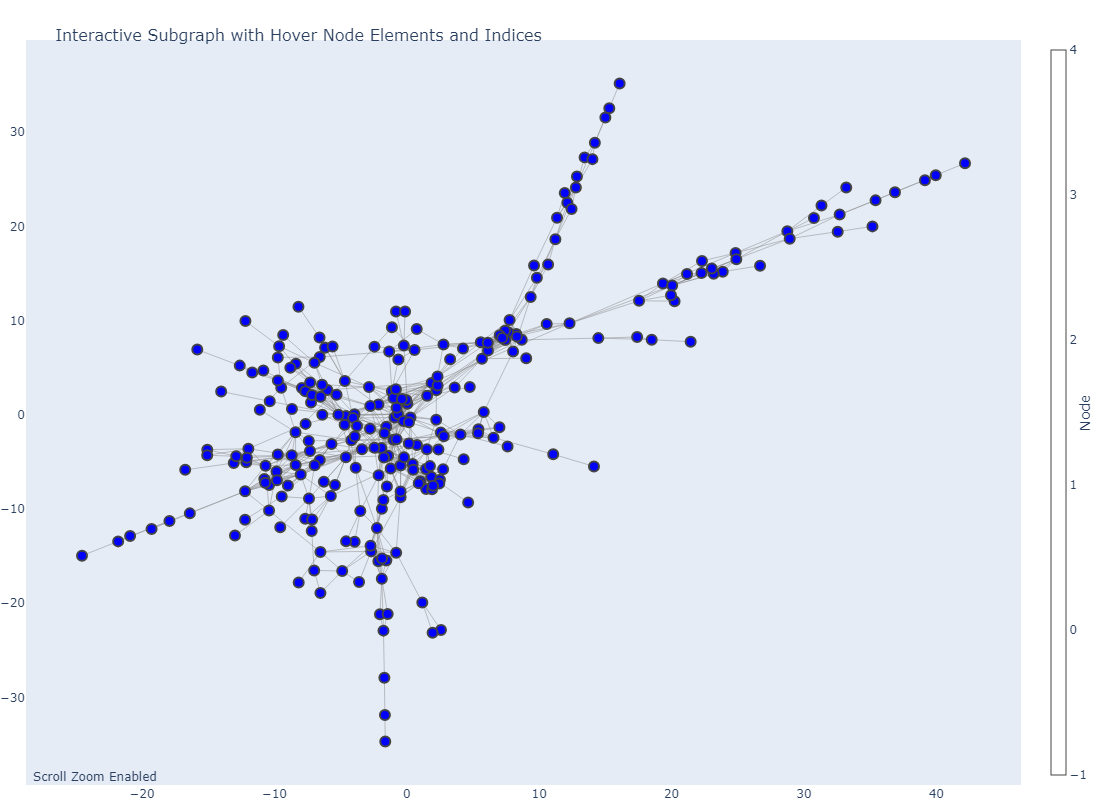

In [16]:
import plotly.graph_objs as go

layout = subgraph.layout("fr")

x_vals = [layout[k][0] for k in range(len(subgraph.vs))]
y_vals = [layout[k][1] for k in range(len(subgraph.vs))]

edge_x = []
edge_y = []
for edge in subgraph.es:
    x0, y0 = layout[edge.source]
    x1, y1 = layout[edge.target]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # Break between edges
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create an edge trace for Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_labels = [f"Subgraph Node Index: {i}, Original Elements: {subgraph.vs[i]['node_elements']}" 
               for i in range(len(subgraph.vs))]

node_trace = go.Scatter(
    x=x_vals, y=y_vals,
    mode='markers',
    hoverinfo='text',
    text=node_labels,  
    marker=dict(
        showscale=True,
        colorscale='Viridis', 
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)
)

node_trace.marker.color = ['blue'] * len(node_trace.x)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Subgraph with Hover Node Elements and Indices',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    annotations=[dict(
                        text="Scroll Zoom Enabled",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False),
                    height=800,
                    width=800
                )
               )

fig.show(config={'scrollZoom': True})


Here we can clearly see a few long branches and then some other clusters. We can now apply algorithms to extract those features

### Branches

We can clearly see a couple of branches stiching out. 
I have been trying to experiment with algorithms to identfy them, but I kinda struggle:(

In [21]:
branche_1 = [225,212,211,10,11,12,224,13,65,253,84,85, 86,185,194,195,79,80]
branche_2 = [252,249,248,240,238,239,255,66,67,16,105,99,91,4,90,1,0,169,142,6,143,2,3,5,208,207,146,25]

node_elements = subgraph.vs["node_elements"]

patients_1 = np.concatenate([node_elements[node] for node in branche_1]).tolist()

unique_patients_1 = set(patients_1)

patients_2 = np.concatenate([node_elements[node] for node in branche_2]).tolist()

unique_patients_2 = set(patients_2)

print(f"Patients in Branch 1: {unique_patients_1}")
print(f"Patients in Branch 2: {unique_patients_2}")


Patients in Branch 1: {96, 320, 354, 450, 358, 422, 106, 301, 113, 405, 21, 407, 534, 247, 540, 510}
Patients in Branch 2: {133, 518, 7, 523, 396, 141, 16, 19, 148, 279, 536, 413, 541, 291, 39, 49, 453, 340, 347, 225, 99, 484, 227, 495, 123, 255}


In [24]:
patient_1_list = list(unique_patients_1)
patient_2_list = list(unique_patients_2)

df_patients_1 = df_breast.iloc[patient_1_list]
df_patients_2 = df_breast.iloc[patient_2_list]

df_patients_1

# df_patients_2


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
96     86211          0       12.180         17.84           77.79      451.1   
320   894604          0       10.250         16.18           66.52      324.2   
354   901011          0       11.140         14.07           71.24      384.6   
450  9111596          0       11.870         21.54           76.83      432.0   
358  9010333          0        8.878         15.49           56.74      241.0   
422   906616          0       11.610         16.02           75.46      408.2   
106   863031          0       11.640         18.33           75.17      412.5   
301   892604          0       12.460         19.89           80.43      471.3   
113   864292          0       10.510         20.19           68.64      334.2   
405   904971          0       10.940         18.59           70.39      370.0   
21   8510824          0        9.504         12.44           60.34      273.9   
407   905190          0       12.850         21.37           82.63      514.5   
534   919537          0       10.960         17.62           70.79      365.6   
247   884626          0       12.890         14.11           84.95      512.2   
540   921385          0       11.540         14.44           74.65      402.9   
510    91550          0       11.740         14.69           76.31      426.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
96           0.10450           0.07057         0.02490              0.02941   
320          0.10610           0.11110         0.06726              0.03965   
354          0.07274           0.06064         0.04505              0.01471   
450          0.06613           0.10640         0.08777              0.02386   
358          0.08293           0.07698         0.04721              0.02381   
422          0.10880           0.11680         0.07097              0.04497   
106          0.11420           0.10170         0.07070              0.03485   
301          0.08451           0.10140         0.06830              0.03099   
113          0.11220           0.13030         0.06476              0.03068   
405          0.10040           0.07460         0.04944              0.02932   
21           0.10240           0.06492         0.02956              0.02076   
407          0.07551           0.08316         0.06126              0.01867   
534          0.09687           0.09752         0.05263              0.02788   
247          0.08760           0.13460         0.13740              0.03980   
540          0.09984           0.11200         0.06737              0.02594   
510          0.08099           0.09661         0.06726              0.02639   

     ...  perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
96   ...            82.14       495.2           0.11400            0.09358   
320  ...            71.53       390.4           0.14020            0.23600   
354  ...            79.62       453.5           0.08864            0.12560   
450  ...            83.51       507.2           0.09457            0.33990   
358  ...            65.27       302.0           0.10150            0.12480   
422  ...            81.93       475.7           0.14150            0.21700   
106  ...            85.51       521.7           0.16880            0.26600   
301  ...            88.13       551.3           0.10500            0.21580   
113  ...            72.62       374.4           0.13000            0.20490   
405  ...            82.76       472.4           0.13630            0.16440   
21   ...            65.13       314.9           0.13240            0.11480   
407  ...            91.63       645.8           0.09402            0.19360   
534  ...            76.43       407.5           0.14280            0.25100   
247  ...           105.00       639.1           0.12540            0.58490   
540  ...            78.78       457.8           0.13450            0.21180   
510  ...            81.25       473.8   

## Compare the persistent diagrams of two branches

Now we have two small subsets of patients for two branches. Let see how they are different on persistent diagrams

In [32]:
import gudhi as gd
import gudhi.representations

In [45]:
point_cloud_columns = [
   'area_mean', 'smoothness_mean', 'texture_mean', 'symmetry_worst', 'concave points_se'
]

point_cloud_1 = df_patients_1[point_cloud_columns].to_numpy()

point_cloud_2 = df_patients_2[point_cloud_columns].to_numpy()

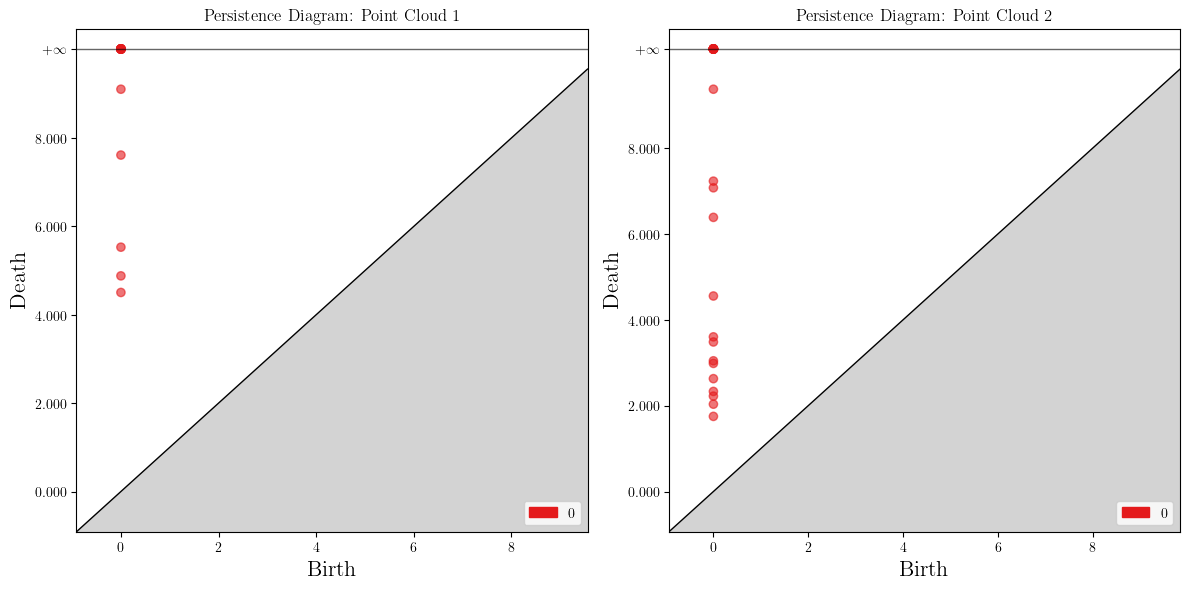

In [49]:
import matplotlib.pyplot as plt

rips_complex_1 = gd.RipsComplex(points=point_cloud_1, max_edge_length=10.0)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension=4)
persistence_1 = simplex_tree_1.persistence()

rips_complex_2 = gd.RipsComplex(points=point_cloud_2, max_edge_length=10.0)
simplex_tree_2 = rips_complex_2.create_simplex_tree(max_dimension=4)
persistence_2 = simplex_tree_2.persistence()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

gd.plot_persistence_diagram(persistence_1, axes=axes[0])
axes[0].set_title('Persistence Diagram: Point Cloud 1')

gd.plot_persistence_diagram(persistence_2, axes=axes[1])
axes[1].set_title('Persistence Diagram: Point Cloud 2')

plt.tight_layout()
plt.show()


## Clusters on a graph 

### Louvain algorithm

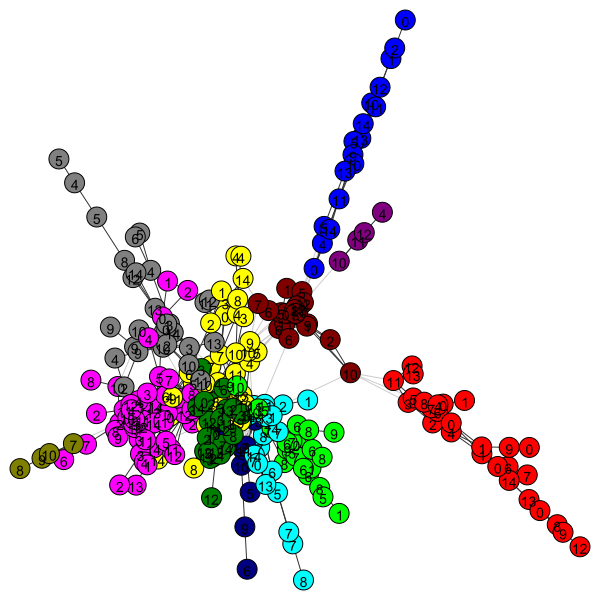

In [50]:
import igraph as ig

clusters = subgraph.community_multilevel()

layout = subgraph.layout("fr")  
ig.plot(clusters, layout=layout, vertex_label=range(15))